<a href="https://colab.research.google.com/github/taeilkeemm/fordatastudy/blob/main/ML_DL_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('data_1.txt', sep = "\t", engine='python', encoding = "cp949")

In [58]:
from sklearn.model_selection import train_test_split

x = df[['KM', 'HP', 'CC']]
y = df[['Price']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [60]:
y_predict = mlr.predict(x_test)

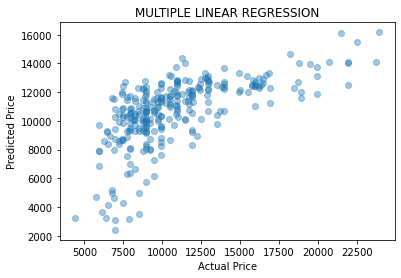

In [61]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [62]:
Predicted_Price = pd.DataFrame(y_predict)
Predicted_Price.describe()

,0
count,288.000000
mean,10654.452044
std,2317.119083
min,2405.907575
25%,9587.581010
50%,10962.727088
75%,12261.383501
max,16169.657564


In [63]:
##회귀직선 계수
print(mlr.coef_)

[[-0.05348088 29.37977809  1.33643601]]


In [64]:
##회귀식 상수
print(mlr.intercept_)

[9282.8348306]


In [65]:
##결정계수 R^2
print(mlr.score(x_train, y_train))

0.36480505917757244


In [71]:
import random
from random import choices
import statsmodels.api as sm

random.seed(1)

num_data = len(df) ## 데이터 개수
num_bootstrap_sample = 2000 ## Bootstrap 샘플 수
 
alpha = 0.05 ## 유의수준
 
y = df['Price']
X = df[['KM', 'HP', 'CC']]
X = sm.add_constant(X)

fit = sm.OLS(y,X).fit() ## 최소 제곱 회귀 모형 적합

fitted_values = fit.fittedvalues ## 적합값
origin_residual = fit.resid ## 잔차
b_est_slope = []
for i in range(num_bootstrap_sample): 
    b_residual = choices(origin_residual,k=num_data) ## bootstrap sample of residual
    y = fitted_values + b_residual
    b_fit = sm.OLS(y,X).fit()
    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [72]:
y

0       13500.000000
1        7315.959578
2       15293.880111
3       13739.255394
4       16770.279392
            ...     
1431    14332.012338
1432     9991.123321
1433     6701.691199
1434    11835.156574
1435    11347.091582
Length: 1436, dtype: float64